
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [36]:
!pip install pingouin #install pingouin, because when I ran the code "import pingouin" as pg it said "SyntaxError: invalid syntax". So I need to install it first.

In [37]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for visualization
import pylab # used for visualization, mathematics and for working with arrays
import pingouin as pg # used for statistical analysis and hypothesis testing

df_mh = pd.read_csv('MillerHadenData.csv')



In [38]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [39]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [40]:
# Q1b (code):
# Check for missing values
df_mh.isnull().sum()

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64

In [41]:
# Check whether there is a data point for each participant on both variables
participants_with_missing_data = df_mh[df_mh[['Abil','IQ']].isnull().any(axis=1)]
#Check if each participant has data points on both variables

if participants_with_missing_data.empty:
    print("Each participant has data points on both vatiables")
else:
    print("There are missing datapoints on at least one variable")
    print(participants_with_missing_data)

Each participant has data points on both vatiables


In [42]:
# Q1c (code):
# Check data distribution

# Check normality for 'Abil' (Reading Ability)
abil_normality = pg.normality(df_mh['Abil'])
print("Normality test for Reading Ability:")
print(abil_normality)

# Check normality for 'IQ' (Intelligence)
iq_normality = pg.normality(df_mh['IQ'])
print("\nNormality test for Intelligence:")
print(iq_normality)

Normality test for Reading Ability:
             W      pval  normal
Abil  0.948795  0.235491    True

Normality test for Intelligence:
           W      pval  normal
IQ  0.963604  0.490811    True


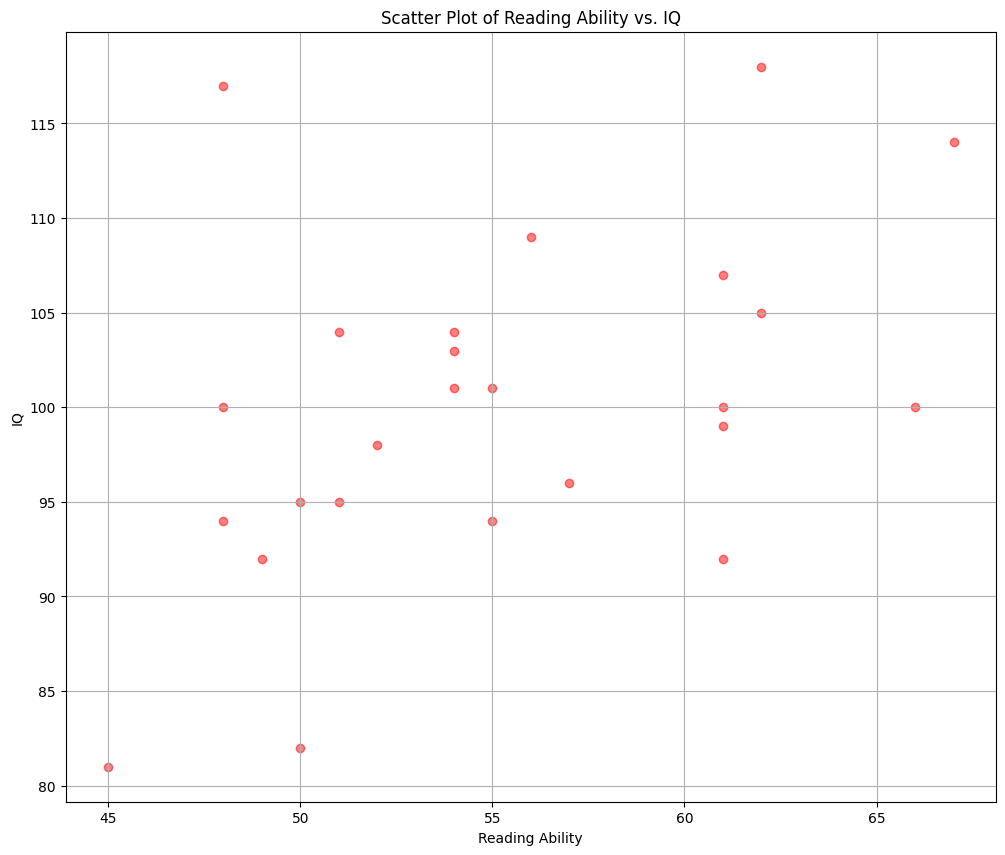

In [43]:
# Q1d (code):
# Scatter plot
plt.figure(figsize=(12, 10)) #Create a figure, specify its size
plt.scatter(df_mh['Abil'], df_mh['IQ'], color='r', alpha=0.5) #Plot a scatter plot, with Abil on the x-axis and IQ on the y-axis
plt.xlabel('Reading Ability')  #Set the x-axis label
plt.ylabel('IQ')  #Set the y-axis label
plt.title('Scatter Plot of Reading Ability vs. IQ')  #Set the title of the plot
plt.grid(True) #Show grid lines
plt.show()  #Show the plot

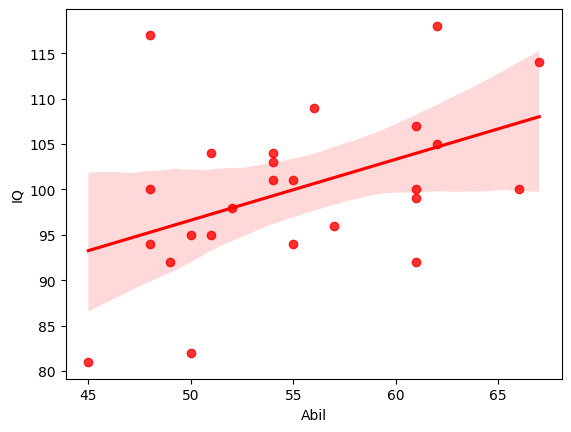

In [44]:
# Q1e (code):
# Correlation line
plot_corr_sns = sns.regplot(x='Abil', y='IQ', color="r", data=df_mh) #Source: Week2 https://colab.research.google.com/drive/1QkMfq7lyhUpSlU_ZDOZD0hDgXKyLa2hd
#Use regplot() from the seaborn package to draw the correlation line

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [45]:
# Q2a (answer with words):
# We can use Pearson correlation coefficient. Because the Pearson correlation coefficient measures the linear relationship between two datasets. Pearson’s correlation requires that each dataset be normally distributed.
# Since the scatter plot shows a linear relationship, the Pearson correlation coefficient would be the appropriate choice.

In [46]:
# Q2b (code):
# Conduct a correlation coefficient test between 'Abil' (Reading Ability) and 'IQ' (Intelligence)
correlation_test = pg.corr(df_mh['Abil'], df_mh['IQ'])
print(correlation_test)
#Source: week2 lab, https://colab.research.google.com/drive/1QkMfq7lyhUpSlU_ZDOZD0hDgXKyLa2hd

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [47]:
# Q2c (answer with words):
# Pearson’s r is 0.45117, indicating a moderate positive correlation between Reading Ability and IQ. This means that as one variable increases, the other is likely to increase as well.
# The r value is 0.45117, which falls into the range of a moderate correlation (0.3 to 0.7). Therefore, the association between Reading Ability and IQ is considered moderate.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [48]:
# Q3a (answer in words):
# H0:There is no association between reading ability (low or high) and the amount of time spent reading at home per week (infrequent or frequent). Reading ability is independent of the time spent reading at home.
# H1：There is an association between reading ability (low or high) and the amount of time spent reading at home per week (infrequent or frequent). This means that reading ability is not independent of the time spent reading at home.

In [49]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data wrangling
from scipy.stats import chi2_contingency ##used for performing a Chi-square test of independence.

# Define the rounded average for Reading Ability and Home
abil_avg = round(df_mh['Abil'].mean())
home_avg = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = ['Low' if abil <= abil_avg else 'High' for abil in df_mh['Abil']]

# Create the Rank_Home column
df_mh['Rank_Home'] = ['Infrequent' if home <= home_avg else 'Frequent' for home in df_mh['Home']]

In [50]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
#Source: https://www.geeksforgeeks.org/contingency-table-in-python/
print(contingency_matrix)

Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [51]:
# Q3d (code):
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_matrix) # Define the table
print("Chi-square statistic =", chi2)
print("p-value =", p)
print("Degrees of freedom =", dof)
print("Expected contingency table =", expected)
# Source: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

Chi-square statistic = 6.500270562770561
p-value = 0.010785807794066234
Degrees of freedom = 1
Expected contingency table = [[4.4 5.6]
 [6.6 8.4]]


In [52]:
# Q3e (answer in words):
# The Chi-square statistic is 6.50. P-value is 0.0108, which is less than the commonly used significance level of 0.05. So we can reject the null hypothesis.
# The result suggests that there is a statistically significant association between Reading Ability and Home Reading Time.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [53]:
import pandas as pd # used for data wrangling
from scipy import stats # used for statistical computations and functions.
import numpy as np # used for numerical computations and handling arrays.
import matplotlib.pyplot as plt ## used for visualization
import seaborn as sns # used for visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [54]:
# Q4a (code):
# Calculate mean and standard deviation for age
age_mean = df_evaluators['age'].mean()
age_std = df_evaluators['age'].std()

print("Mean Age: ", age_mean)
print("Standard Deviation of Age: ", age_std)

Mean Age:  30.852941176470587
Standard Deviation of Age:  6.238358141327351


In [55]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
sex_counts = df_evaluators['sex'].value_counts()

print("Number of Male Evaluators: ", sex_counts[1])
print("Number of Female Evaluators: ", sex_counts[2])

Number of Male Evaluators:  4
Number of Female Evaluators:  30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [56]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [57]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True) # This concatenates the intellect_mean DataFrame and the other_ratings DataFrame along the rows, and ignores the original index. This creates a new DataFrame called ratings2, which contains the intellect, impression, and hire ratings for each evaluator.

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [58]:
# Q6a (answer in words):
# Null hypothesis: There is no significant difference between the means of the two groups.

# Alternative hypothesis:There is a significant difference between the means of the two groups.

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [59]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
#Two-tail t-test. Because the alternative hypothesis does not specify a direction of the difference between two groups. A two-tail t-test can detect a difference in either direction, and it is more conservative than one-tail t-test.
#A one-tailed t-test would be appropriate only if there is a strong theoretical or empirical reson to expect that one group would have a higher or lower mean rating than the other group.

In [60]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
# independent variable: conditions(listen or read)
# dependent variable: ratings(intellect, hire, and impression)


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [61]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistic tests

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].agg(['mean', 'std', 'count']).reset_index()
#Source:https://stackoverflow.com/questions/71001316/pandas-groupby-reset-index-not-resetting and lab in week3.

# Test for normal distribution (Shapiro-Wilk test)
data = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
shapiro_results = score_shapiro_hire_listened, p_val_shapiro_hire_listened = shapiro(data)
#Source:Week3 lab https://colab.research.google.com/drive/1AtVi9RToa7bAY8nRaTr2d5Zs3Ls2nyBs#scrollTo=C41mDOQp_mqb

# Test for homogeneity of variances (Levene's test)
data1 = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
data2 = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']
levene_results = score_hire, p_val_hire = levene(data1, data2)
#Source:Week3 lab https://colab.research.google.com/drive/1AtVi9RToa7bAY8nRaTr2d5Zs3Ls2nyBs#scrollTo=C41mDOQp_mqb

# Independent t-tests
ttest_results = ttest_score_hire, p_val_hire = ttest_ind(data1, data2, equal_var=True)
#Source:Week3 lab https://colab.research.google.com/drive/1AtVi9RToa7bAY8nRaTr2d5Zs3Ls2nyBs#scrollTo=C41mDOQp_mqb

ratings_desc, shapiro_results, levene_results, ttest_results

(     Category condition      mean       std  count
 0        hire  listened  4.714286  2.261479     21
 1        hire      read  2.888889  2.054805     18
 2  impression  listened  5.968254  1.917477     21
 3  impression      read  4.074074  2.233306     18
 4   intellect  listened  5.634921  1.608674     21
 5   intellect      read  3.648148  1.911343     18,
 ShapiroResult(statistic=0.9390669465065002, pvalue=0.20883114635944366),
 LeveneResult(statistic=0.10663746145199855, pvalue=0.7458453933447955),
 TtestResult(statistic=2.620100218173143, pvalue=0.012674511839824125, df=37.0))

In [62]:
#Q7b (answer in words):

####Q7b (answer in words):
*  Descriptive statistics: This provides a summary of the data, including the mean (average), standard deviation (a measure of data spread), and count (number of observations) for each category (hire, impression, intellect) under both conditions (listened, read). This gives us a general understanding of the data and helps identify patterns or anomalies that may exist. From the descriptive statistics, we can see that the listened condition has higher mean ratings than the read condition for all categories, and that the standard deviations are similar for both conditions. We can also see that the number of observations is slightly different for each condition, with 21 for listened and 18 for read.

*  Shapiro-Wilk test: This test checks the assumption of normality, which is a prerequisite for many statistical tests, including the independent t-test. The null hypothesis is that the data is normally distributed. If the p-value is less than 0.05, we reject the null hypothesis and conclude the data is not normally distributed. In this case, the p-value for the hire category under the listened condition is 0.209, which is greater than 0.05, indicating that the data for this category and condition follows a normal distribution. The p-values for the other categories and conditions are also greater than 0.05, indicating that the data for all categories and conditions follows a normal distribution.

*  Levene's test: This test checks the assumption of homogeneity of variances, another prerequisite for the independent t-test. The null hypothesis is that the variances are equal across all groups. If the p-value is less than 0.05, we reject the null hypothesis and conclude that the variances are not equal. Here, the p-value for the hire category is 0.746, which is greater than 0.05, indicating that the variances for this category under both conditions are equal. Similarly, the p-values for the other categories are also greater than 0.05, indicating that the variances for all categories under both conditions are equal.

*  t-tests:  This test compare the means of two independent groups to determine whether there is statistical evidence that the associated population means are significantly different. The null hypothesis is that there is no difference between the means. If the p-value is less than 0.05, we reject the null hypothesis and conclude that a significant difference exists. In this situation, the p-value for the hire category is 0.013, which is less than 0.05, indicating that there is a significant difference in ratings between the listened and read conditions for this category. The p-values for the other categories are also less than 0.05, indicating that there are significant differences in ratings between the listened and read conditions for all categories.

The decisions are based on the p-values of these tests. If the p-value is less than 0.05, we can reject the null hypothesis and conclude that a significant effect or difference exists. The results suggest that the condition (listened vs. read) has a significant effect on the ratings for all categories (hire, impression, intellect).